In [18]:
import grid_data
import numpy as np
import nns
import spherical_data_2
import matplotlib.pyplot as plt
from imblearn.datasets import make_imbalance
from sklearn.metrics import accuracy_score
from kotaro_method import KotaroMethod
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from imblearn.pipeline import Pipeline 
from sklearn.svm import SVC


In [12]:
import collections
nums_spheres = [2,2,4,5,6]
num_samples = 1000000
gt_datas = []
for i in range(0,5):
     dim = i + 1
     data = ()
     data = spherical_data_2.generate_labeled_samples(num_samples, dim, nums_spheres[i])
     gt_datas.append(data)

In [32]:
gt_data = gt_datas[0]
t_datas = []
v_datas = make_imbalance(gt_data[0], gt_data[1],sampling_strategy={1:50, -1:50})
for i in range(2,52,2):
    t_datas.append(make_imbalance(gt_data[0], gt_data[1],sampling_strategy={1:45, -1:i}))

In [34]:
svm_pipe = Pipeline([('SVM', SVC(random_state=0))])
param_svm = {
    'SVM__C': [10 ** i for i in range(-5,6)],
    'SVM__kernel': ["linear","rbf", "sigmoid"],
    'SVM__decision_function_shape': ["ovo", "ovr"],
}
scoring = 'accuracy'
cv = 5
gscv = GridSearchCV(svm_pipe, param_grid=param_svm,scoring=scoring, cv=cv, refit=True, )

In [ ]:
wsvm_pipe = 

In [35]:

acc_scores = []
for t_data in t_datas:
    gscv.fit(t_data[0],t_data[1])
    predict = gscv.predict(v_datas[0])
    acc = accuracy_score(v_datas[1], predict)
    acc_scores.append(acc)
    

/home/torainu256/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/torainu256/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


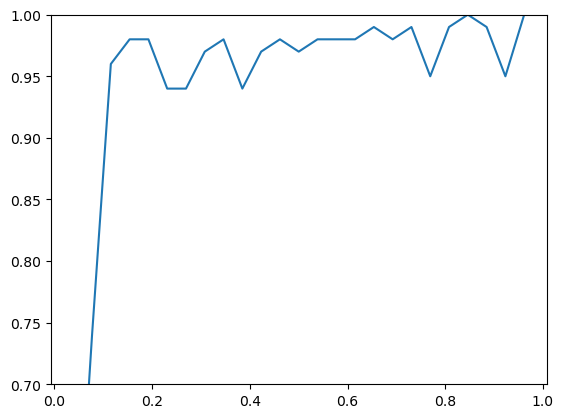

In [38]:
x = [i/52 for i in range(2,52,2)]
plt.plot(x, acc_scores)
plt.ylim((0.7,1.0))
plt.show()